In [ ]:
%pip install tensorflow opencv-python mediapipe

In [ ]:
import numpy as np
import mediapipe as mp
import cv2

In [19]:
mph=mp.solutions.holistic
mpd=mp.solutions.drawing_utils

In [47]:
def dl(image,results):
    mpd.draw_landmarks(image,results.face_landmarks,mph.FACEMESH_TESSELATION,mpd.DrawingSpec(color=(34,234,5),thickness=1,circle_radius=1), mpd.DrawingSpec(color=(34,123,90),thickness=1,circle_radius=1))
    mpd.draw_landmarks(image,results.pose_landmarks,mph.POSE_CONNECTIONS, mpd.DrawingSpec(color=(23,5,100),thickness=2,circle_radius=3), mpd.DrawingSpec(color=(123,80,67),thickness=2,circle_radius=2))
    mpd.draw_landmarks(image,results.left_hand_landmarks,mph.HAND_CONNECTIONS,mpd.DrawingSpec(color=(90,78,56),thickness=2,circle_radius=4), mpd.DrawingSpec(color=(34,123,90),thickness=2,circle_radius=2))
    mpd.draw_landmarks(image,results.right_hand_landmarks,mph.HAND_CONNECTIONS, mpd.DrawingSpec(color=(67,34,90),thickness=2,circle_radius=4), mpd.DrawingSpec(color=(23,4,56),thickness=2,circle_radius=2))


In [21]:
def detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [44]:
mpd.draw_landmarks??

Signature:
mpd.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_COLOR),

In [66]:
capture = cv2.VideoCapture(0)
with mph.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as model:
    while capture.isOpened():
        ret, frame = capture.read()
        image,results=detection(frame,model)
        dl(image,results)
        cv2.imshow('Sign Language Recognition',image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capture.release()
    cv2.destroyAllWindows()

e:\projects\sign language\venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [49]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [56]:
from matplotlib import pyplot

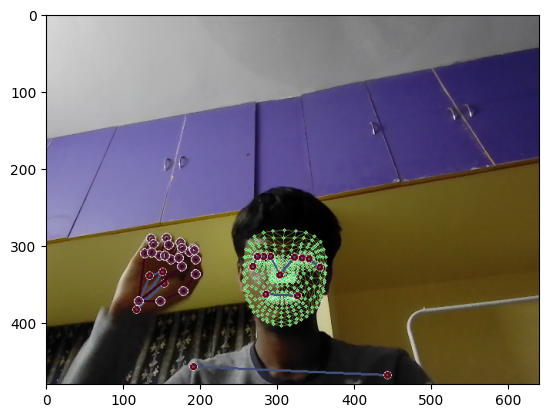

In [57]:
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [69]:
def arr(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose,face,left_hand,right_hand])

In [ ]:
import os 

In [ ]:
PATH = os.path.join('Data')
actions = np.array() 
total_number_of_sequences = 30
sequence_length = 30